In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cassandra23-ps-2/dataset/sample_submissions.csv
/kaggle/input/cassandra23-ps-2/dataset/train_data.csv
/kaggle/input/cassandra23-ps-2/dataset/test_data.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
train_dir = '/kaggle/input/cassandra23-ps-2/dataset/train_data.csv'
test_dir = '/kaggle/input/cassandra23-ps-2/dataset/test_data.csv'
test_data = pd.read_csv(test_dir)
train_data = pd.read_csv(train_dir)


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72158 entries, 0 to 72157
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   UID                             72158 non-null  object 
 1   trip_creation_time              68643 non-null  object 
 2   route_schedule_uuid             69263 non-null  object 
 3   route_type                      72158 non-null  object 
 4   trip_uuid                       72158 non-null  object 
 5   source_center                   72158 non-null  object 
 6   source_name                     72158 non-null  object 
 7   destination_center              71355 non-null  object 
 8   destination_name                72158 non-null  object 
 9   od_start_time                   72158 non-null  object 
 10  od_end_time                     71438 non-null  object 
 11  start_scan_to_end_scan          72158 non-null  float64
 12  is_cutoff                       

In [5]:
len(train_data['route_schedule_uuid'].unique())

1470

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72158 entries, 0 to 72157
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   UID                             72158 non-null  object 
 1   trip_creation_time              72158 non-null  object 
 2   route_schedule_uuid             72158 non-null  object 
 3   route_type                      72158 non-null  object 
 4   trip_uuid                       72158 non-null  object 
 5   source_center                   72158 non-null  object 
 6   source_name                     72158 non-null  object 
 7   destination_center              72158 non-null  object 
 8   destination_name                72158 non-null  object 
 9   od_start_time                   72158 non-null  object 
 10  od_end_time                     72158 non-null  object 
 11  start_scan_to_end_scan          72158 non-null  float64
 12  is_cutoff                       

<AxesSubplot:>

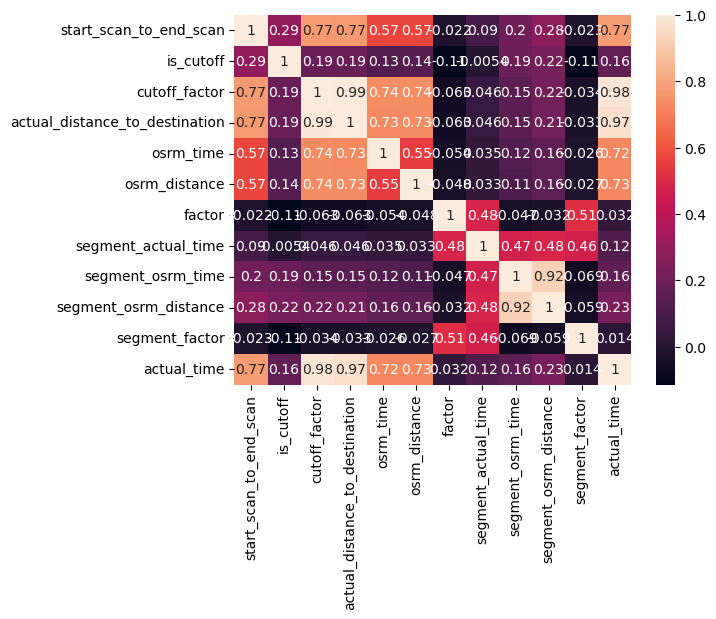

In [7]:
sns.heatmap(train_data.corr() ,annot=True)

In [8]:
# le = LabelEncoder()

# # fit and transform categorical variable
# train_data['color_encoded'] = le.fit_transform(train_data['color'])

In [9]:
train_data["trip_creation_time"][0]

'2018-09-15 02:23:18.656742'

In [10]:
train_data=train_data.dropna(subset=["trip_creation_time"])

In [11]:
train_data=train_data.dropna(subset=["od_end_time"])

In [12]:
train_data=train_data.dropna(subset=["cutoff_timestamp"])

In [13]:
train_data.isnull().sum()

UID                                   0
trip_creation_time                    0
route_schedule_uuid                2689
route_type                            0
trip_uuid                             0
source_center                         0
source_name                           0
destination_center                  754
destination_name                      0
od_start_time                         0
od_end_time                           0
start_scan_to_end_scan                0
is_cutoff                             0
cutoff_factor                         0
cutoff_timestamp                      0
actual_distance_to_destination        0
osrm_time                         13363
osrm_distance                     13410
factor                             1525
segment_actual_time                   0
segment_osrm_time                     0
segment_osrm_distance                 0
segment_factor                     1089
actual_time                           0
dtype: int64

In [14]:
train_data

,UID,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,actual_time
0,lWYYrbNEdf,2018-09-15 02:23:18.656742,thanos::sroute:9d8ed3f7-a8af-4393-ad7a-c57a720...,FTL,trip-153697819865649878,IND832109AAB,Jamshedpur_Central_I_3 (Jharkhand),IND834002AAB,Ranchi_Hub (Jharkhand),2018-09-15 02:23:18.656742,...,2018-09-15 04:45:23,158.807515,778.672716,1228.735753,2.782826,77.988686,20.793472,28.475783,3.292773,100.0
1,iNJcHQlPCm,2018-09-30 15:07:48.971326,thanos::sroute:b9142a73-d68f-46ec-9afc-d145479...,FTL,trip-153832006897106333,IND422011AAD,Nashik_TgrniaRD_I (Maharashtra),IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),2018-09-30 22:38:13.903069,...,2018-10-01 05:38:30,81.388109,227.479029,NaN,3.625248,68.517914,18.787231,34.612259,4.277350,61.0
2,U6N0M43qwR,2018-09-23 22:15:46.635975,thanos::sroute:883e99fa-50a3-40e0-a2e2-9b12ed6...,FTL,trip-153774094663572416,IND845305AAA,Raxaul_KairiyaT_D (Bihar),NaN,Muzaffrpur_Bbganj_I (Bihar),2018-09-24 03:56:37.016232,...,2018-09-24 09:21:30,134.486898,400.072069,1188.943158,4.415969,70.475386,24.371978,29.867950,5.322072,69.0
3,RrJUneuYNj,2018-09-21 05:11:44.833176,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153750670483274503,IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),IND854326AAB,Purnia_Central_H_2 (Bihar),2018-09-22 10:08:32.593022,...,2018-09-22 14:09:17,262.866674,510.123878,999.421258,2.946647,101.876844,19.588977,27.794019,4.265799,300.0
4,7QLdD7iRC9,2018-09-18 01:10:49.936747,thanos::sroute:b43ec86d-59c1-452c-b4a9-807d357...,FTL,trip-153723305402762987,IND411033AAA,Pune_Tathawde_H (Maharashtra),IND501359AAE,Hyderabad_Shamshbd_H (Telangana),2018-09-18 01:10:49.936747,...,2018-09-18 12:14:05,379.389280,NaN,NaN,1.998790,46.571301,22.671495,26.971844,3.553652,286.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72153,dNuV95njhn,2018-09-29 12:35:30.065739,thanos::sroute:ace9e650-93bd-49ab-9400-8ed7a29...,FTL,trip-153822453006548340,IND501359AAE,Hyderabad_Shamshbd_H (Telangana),IND585104AAA,Gulbarga_Nehrugnj_I (Karnataka),2018-09-29 12:35:30.065739,...,2018-09-29 20:08:31,135.001150,NaN,1392.622148,1.950803,55.856356,39.233287,46.999351,1.383605,92.0
72154,ZSrzBfWx77,2018-09-22 11:00:33.571928,thanos::sroute:34b3abb5-f538-4f43-bbeb-5b12c1a...,Carting,trip-153761403357161860,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND560083AAB,Bengaluru_Bnnrghta_L (Karnataka),2018-09-22 11:00:33.571928,...,2018-09-22 13:11:21,74.245265,374.255819,NaN,1.927801,35.976514,13.607794,15.139818,1.456469,30.0
72155,XsIYBRVK2V,2018-09-14 23:01:12.630742,thanos::sroute:16dbdb8b-1ca6-4d26-a45c-18d378e...,FTL,trip-153696607263047584,IND629179AAA,Marthandam_Nallur_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-09-15 04:20:06.629681,...,2018-09-15 06:53:24,54.097087,895.612578,902.191591,2.148569,44.101033,23.355458,27.510588,2.346207,74.0
72156,6YwMOShK5E,2018-09-22 06:11:41.998188,thanos::sroute:23372931-5898-4276-970b-0df5070...,FTL,trip-153759670199790692,IND110037AAM,Delhi_Airport_H (Delhi),IND282001AAA,Agra_Idgah_P (Uttar Pradesh),2018-09-22 06:11:41.998188,...,2018-09-22 15:42:27,99.918631,NaN,1393.905281,2.206373,37.771823,18.740087,29.929128,2.499566,122.0


In [15]:
train_data.columns

Index(['UID', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'osrm_time',
       'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'actual_time'],
      dtype='object')

In [16]:
train_data.isnull().sum()

UID                                   0
trip_creation_time                    0
route_schedule_uuid                2689
route_type                            0
trip_uuid                             0
source_center                         0
source_name                           0
destination_center                  754
destination_name                      0
od_start_time                         0
od_end_time                           0
start_scan_to_end_scan                0
is_cutoff                             0
cutoff_factor                         0
cutoff_timestamp                      0
actual_distance_to_destination        0
osrm_time                         13363
osrm_distance                     13410
factor                             1525
segment_actual_time                   0
segment_osrm_time                     0
segment_osrm_distance                 0
segment_factor                     1089
actual_time                           0
dtype: int64

In [17]:
test_data.isnull().sum()

UID                               0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

In [18]:
object_cols = ['od_end_time']
for col in object_cols:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)
   

In [19]:
object_cols = ['od_end_time']
for col in object_cols:
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)

In [20]:
train_data.drop('UID', axis=1, inplace=True) #check this

In [21]:
test_data.drop('UID', axis=1, inplace=True) #check this

In [22]:
object_cols = ['trip_creation_time', 'route_schedule_uuid', 'destination_center', 'cutoff_timestamp']
for col in object_cols:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)

In [23]:
object_cols = ['trip_creation_time', 'route_schedule_uuid', 'destination_center', 'cutoff_timestamp']
for col in object_cols:
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)

In [24]:
train_data.isnull().sum()

trip_creation_time                    0
route_schedule_uuid                   0
route_type                            0
trip_uuid                             0
source_center                         0
source_name                           0
destination_center                    0
destination_name                      0
od_start_time                         0
od_end_time                           0
start_scan_to_end_scan                0
is_cutoff                             0
cutoff_factor                         0
cutoff_timestamp                      0
actual_distance_to_destination        0
osrm_time                         13363
osrm_distance                     13410
factor                             1525
segment_actual_time                   0
segment_osrm_time                     0
segment_osrm_distance                 0
segment_factor                     1089
actual_time                           0
dtype: int64

In [25]:
test_data.isnull().sum()

trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

In [26]:
train_data['osrm_time'].fillna(train_data['osrm_time'].median(), inplace=True)
train_data['osrm_distance'].fillna(train_data['osrm_distance'].median(), inplace=True)
train_data['factor'].fillna(train_data['factor'].median(), inplace=True)
train_data['segment_factor'].fillna(train_data['segment_factor'].median(), inplace=True)

In [27]:
train_data.isnull().sum()

trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
actual_time                       0
dtype: int64

In [28]:
train_data['trip_creation_time'] = pd.to_datetime(train_data['trip_creation_time'])
train_data['od_start_time'] = pd.to_datetime(train_data['od_start_time'])
train_data['od_end_time'] = pd.to_datetime(train_data['od_end_time'])
train_data['cutoff_timestamp'] = pd.to_datetime(train_data['cutoff_timestamp'])

In [29]:
test_data['trip_creation_time'] = pd.to_datetime(test_data['trip_creation_time'])
test_data['od_start_time'] = pd.to_datetime(test_data['od_start_time'])
test_data['od_end_time'] = pd.to_datetime(test_data['od_end_time'])
test_data['cutoff_timestamp'] = pd.to_datetime(test_data['cutoff_timestamp'])

In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67080 entries, 0 to 72157
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_creation_time              67080 non-null  datetime64[ns]
 1   route_schedule_uuid             67080 non-null  object        
 2   route_type                      67080 non-null  object        
 3   trip_uuid                       67080 non-null  object        
 4   source_center                   67080 non-null  object        
 5   source_name                     67080 non-null  object        
 6   destination_center              67080 non-null  object        
 7   destination_name                67080 non-null  object        
 8   od_start_time                   67080 non-null  datetime64[ns]
 9   od_end_time                     67080 non-null  datetime64[ns]
 10  start_scan_to_end_scan          67080 non-null  float64       
 11  is

In [31]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72158 entries, 0 to 72157
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_creation_time              72158 non-null  datetime64[ns]
 1   route_schedule_uuid             72158 non-null  object        
 2   route_type                      72158 non-null  object        
 3   trip_uuid                       72158 non-null  object        
 4   source_center                   72158 non-null  object        
 5   source_name                     72158 non-null  object        
 6   destination_center              72158 non-null  object        
 7   destination_name                72158 non-null  object        
 8   od_start_time                   72158 non-null  datetime64[ns]
 9   od_end_time                     72158 non-null  datetime64[ns]
 10  start_scan_to_end_scan          72158 non-null  float64       
 11  is

In [32]:
# categorical_cols = ['route_type', 'source_center', 'source_name', 'destination_center', 'destination_name']
# train_data = pd.get_dummies(train_data, columns=categorical_cols)

categorical_cols = ['route_type']
train_data = pd.get_dummies(train_data, columns=categorical_cols)

In [33]:
categorical_cols1 = ['route_type']
test_data = pd.get_dummies(test_data, columns=categorical_cols1)

In [34]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72158 entries, 0 to 72157
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_creation_time              72158 non-null  datetime64[ns]
 1   route_schedule_uuid             72158 non-null  object        
 2   trip_uuid                       72158 non-null  object        
 3   source_center                   72158 non-null  object        
 4   source_name                     72158 non-null  object        
 5   destination_center              72158 non-null  object        
 6   destination_name                72158 non-null  object        
 7   od_start_time                   72158 non-null  datetime64[ns]
 8   od_end_time                     72158 non-null  datetime64[ns]
 9   start_scan_to_end_scan          72158 non-null  float64       
 10  is_cutoff                       72158 non-null  bool          
 11  cu

In [35]:
test_data['route_type_FTL']

0        0
1        0
2        0
3        0
4        1
        ..
72153    0
72154    0
72155    0
72156    0
72157    0
Name: route_type_FTL, Length: 72158, dtype: uint8

In [36]:
train_data.drop(["route_type_Carting"],axis=1,inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67080 entries, 0 to 72157
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_creation_time              67080 non-null  datetime64[ns]
 1   route_schedule_uuid             67080 non-null  object        
 2   trip_uuid                       67080 non-null  object        
 3   source_center                   67080 non-null  object        
 4   source_name                     67080 non-null  object        
 5   destination_center              67080 non-null  object        
 6   destination_name                67080 non-null  object        
 7   od_start_time                   67080 non-null  datetime64[ns]
 8   od_end_time                     67080 non-null  datetime64[ns]
 9   start_scan_to_end_scan          67080 non-null  float64       
 10  is_cutoff                       67080 non-null  bool          
 11  cu

In [37]:
le = LabelEncoder()

# fit and transform categorical variable
train_data['route_schedule_uuid']= le.fit_transform(train_data['route_schedule_uuid'])


In [38]:
object_columns = train_data.select_dtypes(include=['object'])

# print the names of the object columns
print(object_columns.columns)

Index(['trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name'],
      dtype='object')


In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67080 entries, 0 to 72157
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_creation_time              67080 non-null  datetime64[ns]
 1   route_schedule_uuid             67080 non-null  int64         
 2   trip_uuid                       67080 non-null  object        
 3   source_center                   67080 non-null  object        
 4   source_name                     67080 non-null  object        
 5   destination_center              67080 non-null  object        
 6   destination_name                67080 non-null  object        
 7   od_start_time                   67080 non-null  datetime64[ns]
 8   od_end_time                     67080 non-null  datetime64[ns]
 9   start_scan_to_end_scan          67080 non-null  float64       
 10  is_cutoff                       67080 non-null  bool          
 11  cu

In [40]:
le = LabelEncoder()

# fit and transform categorical variable
test_data['route_schedule_uuid']= le.fit_transform(test_data['route_schedule_uuid'])


In [41]:
train_data['trip_uuid']= le.fit_transform(train_data['trip_uuid'])
test_data['trip_uuid']= le.fit_transform(test_data['trip_uuid'])

In [42]:
train_data['source_center']= le.fit_transform(train_data['source_center'])
test_data['source_center']= le.fit_transform(test_data['source_center'])

In [43]:
train_data['source_name']= le.fit_transform(train_data['source_name'])
test_data['source_name']= le.fit_transform(test_data['source_name'])

In [44]:
train_data['destination_center']= le.fit_transform(train_data['destination_center'])
test_data['destination_center']= le.fit_transform(test_data['destination_center'])

In [45]:
train_data['destination_name']= le.fit_transform(train_data['destination_name'])
test_data['destination_name']= le.fit_transform(test_data['destination_name'])

In [46]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67080 entries, 0 to 72157
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_creation_time              67080 non-null  datetime64[ns]
 1   route_schedule_uuid             67080 non-null  int64         
 2   trip_uuid                       67080 non-null  int64         
 3   source_center                   67080 non-null  int64         
 4   source_name                     67080 non-null  int64         
 5   destination_center              67080 non-null  int64         
 6   destination_name                67080 non-null  int64         
 7   od_start_time                   67080 non-null  datetime64[ns]
 8   od_end_time                     67080 non-null  datetime64[ns]
 9   start_scan_to_end_scan          67080 non-null  float64       
 10  is_cutoff                       67080 non-null  bool          
 11  cu

In [47]:
test_data.drop(["route_type_Carting"],axis=1,inplace=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72158 entries, 0 to 72157
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_creation_time              72158 non-null  datetime64[ns]
 1   route_schedule_uuid             72158 non-null  int64         
 2   trip_uuid                       72158 non-null  int64         
 3   source_center                   72158 non-null  int64         
 4   source_name                     72158 non-null  int64         
 5   destination_center              72158 non-null  int64         
 6   destination_name                72158 non-null  int64         
 7   od_start_time                   72158 non-null  datetime64[ns]
 8   od_end_time                     72158 non-null  datetime64[ns]
 9   start_scan_to_end_scan          72158 non-null  float64       
 10  is_cutoff                       72158 non-null  bool          
 11  cu

In [48]:
compare_datetime = pd.to_datetime("2019-01-01 00:00:00")

# loop through datetime columns and calculate difference in hours
for col in train_data.select_dtypes(include=['datetime']):
    train_data[col + '_diff_hours'] = (-train_data[col].astype(int)/ 10**9 +compare_datetime.timestamp()) / 3600

# drop original datetime columns
train_data = train_data.drop(['trip_creation_time', 'od_start_time','od_end_time','cutoff_timestamp'], axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """


In [49]:
compare_datetime = pd.to_datetime("2019-01-01 00:00:00")

# loop through datetime columns and calculate difference in hours
for col in test_data.select_dtypes(include=['datetime']):
    test_data[col + '_diff_hours'] = (-test_data[col].astype(int)/ 10**9 +compare_datetime.timestamp()) / 3600

# drop original datetime columns
test_data = test_data.drop(['trip_creation_time', 'od_start_time','od_end_time','cutoff_timestamp'], axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """


from sklearn.model_selection import train_test_split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train = train_data.drop('actual_time', axis=1)
y_train = train_data['actual_time']
X_test = X_train.sample(frac=0.095, random_state=42)
y_test = y_train.loc[X_test.index]
X_train = X_train.drop(X_test.index)
y_train = y_train.loc[X_train.index]

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
dt = RandomForestRegressor(n_estimators = 40, random_state = 0)
dt.fit(X_train, y_train)

RandomForestRegressor(n_estimators=40, random_state=42)

In [54]:
# error_rate=[]
# for i in range(1,41):
#     dt=KNeighborsRegressor(n_neighbors=i)
#     dt.fit(X_train,y_train)
#     predict_i=dt.predict(X_test)
#     error_rate.append(np.mean(predict_i!=y_test))
    

In [55]:
# plt.plot(range(1,41),error_rate,color="blue",marker="o",markersize=10,markerfacecolor="red",linestyle="dashed")

In [75]:
y_pred = dt.predict(X_test)

In [76]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3221.4800830652757


In [77]:
r2 = dt.score(X_test, y_test)
print("R-squared:", r2)

R-squared: 0.9914957688178632


In [79]:
from sklearn.metrics import mean_absolute_error

In [80]:
mae = mean_absolute_error(y_test, y_pred)

In [82]:
mae_percentage = mae / y_test.mean() * 100
print("Mean Absolute Error (MAE): {:.2f}%".format(mae_percentage))

Mean Absolute Error (MAE): 6.96%


In [83]:
accuracy = (1 - mae/y_test.mean()) * 100

print("Accuracy: {:.2f}%".format(accuracy))

Accuracy: 93.04%


In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [64]:
predicted_actual_time = dt.predict(test_data)

In [65]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72158 entries, 0 to 72157
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   route_schedule_uuid             72158 non-null  int64  
 1   trip_uuid                       72158 non-null  int64  
 2   source_center                   72158 non-null  int64  
 3   source_name                     72158 non-null  int64  
 4   destination_center              72158 non-null  int64  
 5   destination_name                72158 non-null  int64  
 6   start_scan_to_end_scan          72158 non-null  float64
 7   is_cutoff                       72158 non-null  bool   
 8   cutoff_factor                   72158 non-null  int64  
 9   actual_distance_to_destination  72158 non-null  float64
 10  osrm_time                       72158 non-null  float64
 11  osrm_distance                   72158 non-null  float64
 12  factor                          

In [66]:
predict=dt.predict(test_data)

In [67]:
u=pd.read_csv('/kaggle/input/cassandra23-ps-2/dataset/test_data.csv')

In [68]:
output5=pd.DataFrame(u["UID"],columns=["UID"])

In [69]:
output5["actual_time"]=predict

In [70]:
output5.head()

,UID,actual_time
0,XMsT9clviB,40.825
1,1iUuyRUZ2Y,59.925
2,wancwiAIU3,12.400
3,1tIt8EwJjB,64.100
4,W2vL6bJrjt,31.250


In [71]:
output5.to_csv("output5.csv")

In [72]:
train_data.head()

,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,is_cutoff,cutoff_factor,actual_distance_to_destination,...,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,actual_time,route_type_FTL,trip_creation_time_diff_hours,od_start_time_diff_hours,od_end_time_diff_hours,cutoff_timestamp_diff_hours
0,853,2082,1406,634,1381,1154,713.521495,True,44,158.807515,...,77.988686,20.793472,28.475783,3.292773,100.0,1,2589.611484,2589.611484,2585.440049,2587.243611
1,1021,11494,580,1001,574,197,902.759458,True,22,81.388109,...,68.517914,18.787231,34.612259,4.277350,61.0,1,2216.869730,2209.362805,2201.189545,2202.358333
2,754,7681,1421,1184,6,942,923.666146,True,22,134.486898,...,70.475386,24.371978,29.867950,5.322072,69.0,1,2377.737046,2372.056384,2364.749771,2366.641667
3,817,6006,1411,961,1422,1116,705.451567,True,176,262.866674,...,101.876844,19.588977,27.794019,4.265799,300.0,1,2442.804213,2413.857613,2404.710488,2409.845278
4,994,3931,538,1133,715,563,1109.682268,True,198,379.389280,...,46.571301,22.671495,26.971844,3.553652,286.0,1,2518.819462,2518.819462,2502.019875,2507.765278


In [73]:
len(test_data.columns)

22

In [74]:
test_data.columns.value_counts()

route_schedule_uuid               1
trip_uuid                         1
od_end_time_diff_hours            1
od_start_time_diff_hours          1
trip_creation_time_diff_hours     1
route_type_FTL                    1
segment_factor                    1
segment_osrm_distance             1
segment_osrm_time                 1
segment_actual_time               1
factor                            1
osrm_distance                     1
osrm_time                         1
actual_distance_to_destination    1
cutoff_factor                     1
is_cutoff                         1
start_scan_to_end_scan            1
destination_name                  1
destination_center                1
source_name                       1
source_center                     1
cutoff_timestamp_diff_hours       1
dtype: int64